Dataset link: https://www.kaggle.com/datasets/algord/fake-news


In [11]:

!pip install pyTsetlinMachine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pyTsetlinMachine.tm import MultiClassTsetlinMachine


In [2]:
file_path = '/content/FakeNewsNet.csv'

df = pd.read_csv(file_path)

print("DataFrame Information:")
print(df.info())

print("\nFirst Row of the DataFrame:")
print(df.iloc[0])

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB
None

First Row of the DataFrame:
title            Kandi Burruss Explodes Over Rape Accusation on...
news_url         http://toofab.com/2017/05/08/real-housewives-a...
source_domain                                           toofab.com
tweet_num                                                       42
real                                                             1
Name: 0, dtype: object


In [3]:
random_articles = df.sample(n=10)

for index, row in random_articles.iterrows():
    print(f"Title: {row['title']}")
    print(f"News URL: {row['news_url']}")
    print(f"Source Domain: {row['source_domain']}")
    print(f"True/False: {'True' if row['real'] == 1 else 'False'}")  # Assuming 'real' column indicates true or false
    print("------")

Title: Selena Gomez’s mom told her not to work with Woody Allen
News URL: https://www.nydailynews.com/entertainment/movies/selena-gomez-mom-told-not-work-woody-allen-article-1.3760060
Source Domain: www.nydailynews.com
True/False: True
------
Title: Paris Jackson Clarifies Her Dating Status With Cara Delevingne, Ashley Benson, and Caroline D'Amore
News URL: www.wmagazine.com/story/paris-jackson-cara-delevingne-ashley-benson-caroline-damore-rumors
Source Domain: www.wmagazine.com
True/False: False
------
Title: Duchess Catherine and Princess Mette-Marit are giving us major Frozen vibes
News URL: https://www.channel24.co.za/Gossip/Royal-News/duchess-catherine-and-princess-mette-marit-are-giving-us-major-frozen-vibes-20180204
Source Domain: www.channel24.co.za
True/False: True
------
Title: How Rita Ora Masters Self-Acceptance With The Open Mic Project
News URL: http://www.powerslc.com/2017/11/17/how-rita-ora-masters-self-acceptance-with-the-open-mic-project/
Source Domain: www.powerslc.c

In [4]:
print("Missing values in each column:")
print(df.isnull().sum())

# Handling missing values
df.dropna(inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values in each column:
title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

Missing values after handling:
title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64


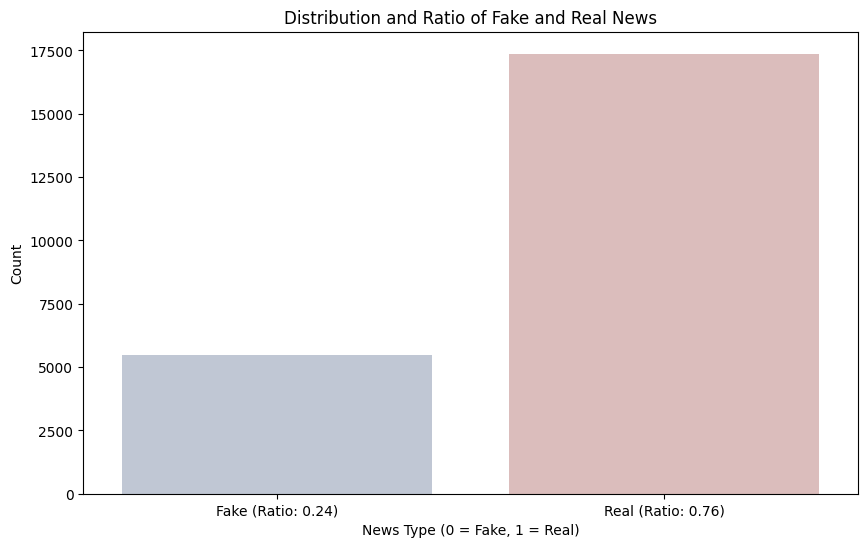

In [5]:
fake_real_count = df['real'].value_counts()

total_news = len(df)
fake_ratio = fake_real_count[0] / total_news
real_ratio = fake_real_count[1] / total_news

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=fake_real_count.index, y=fake_real_count.values, palette="vlag")
plt.title('Distribution and Ratio of Fake and Real News')
plt.xlabel('News Type (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake (Ratio: {:.2f})'.format(fake_ratio), 'Real (Ratio: {:.2f})'.format(real_ratio)])

# Show the plot
plt.show()

In [6]:
df.drop_duplicates(subset='title', inplace=True)

print("Dataset information after removing duplicates:")
print(df.info())
print("Missing values in each column before handling:")
print(df.isnull().sum())

df.dropna(inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Save the cleaned dataset to a new file (e.g., CleanedDataset.csv)
df.to_csv('CleanedDataset.csv', index=False)

Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21398 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          21398 non-null  object
 1   news_url       21398 non-null  object
 2   source_domain  21398 non-null  object
 3   tweet_num      21398 non-null  int64 
 4   real           21398 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1003.0+ KB
None
Missing values in each column before handling:
title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64

Missing values after handling:
title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64


In [7]:
df = pd.read_csv('/content/CleanedDataset.csv')

fake_news = df[df['real'] == 0]
real_news = df[df['real'] == 1]

# Determine the number of samples to take from each category
desired_samples = min(len(fake_news), len(real_news))

# Randomly sample from each category
sampled_fake_news = fake_news.sample(n=desired_samples, random_state=42)
sampled_real_news = real_news.sample(n=desired_samples, random_state=42)

# Combine the sampled data to create a balanced dataset
balanced_dataset = pd.concat([sampled_fake_news, sampled_real_news])

# Save the balanced dataset to a new CSV file
balanced_dataset.to_csv('balanced_fake_real_news_dataset.csv', index=False)

print(f"Balanced dataset saved as 'balanced_fake_real_news_dataset.csv' with {desired_samples} samples for each category.")


Balanced dataset saved as 'balanced_fake_real_news_dataset.csv' with 4996 samples for each category.


In [8]:
balanced_dataset = pd.read_csv('balanced_fake_real_news_dataset.csv')

# Count the occurrences of each category (0 for fake news and 1 for real news)
category_counts = balanced_dataset['real'].value_counts()

# Print the counts
print("Number of 0's (fake news):", category_counts[0])
print("Number of 1's (real news):", category_counts[1])

Number of 0's (fake news): 4996
Number of 1's (real news): 4996


In [10]:
balanced_dataset = pd.read_csv('balanced_fake_real_news_dataset.csv')

X = balanced_dataset['title']
y = balanced_dataset['real']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorizing the text data
vectorizer = CountVectorizer(stop_words='english', max_features=5000, binary=True)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Initialize the Tsetlin Machine with adjusted hyperparameters
tm = MultiClassTsetlinMachine(number_of_clauses=100, T=15, s=3.9)

# Train the TM on the BoW vectorized training data
tm.fit(X_train_bow.toarray(), y_train)

# Predictions
y_pred_sparse = tm.predict(X_test_bow.toarray())
y_pred = np.asarray(y_pred_sparse).flatten()

# Evaluate the performance of the TM
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.61
Precision: 0.73
Recall: 0.34
F1 Score: 0.46
Confusion Matrix:
[[875 125]
 [664 335]]


In [12]:
balanced_dataset = pd.read_csv('balanced_fake_real_news_dataset.csv')

X = balanced_dataset['title']
y = balanced_dataset['real']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorizing the text data
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the vectorized training data
nb_classifier.fit(X_train_bow, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_bow)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.76
Precision: 0.77
Recall: 0.75
F1 Score: 0.76
Confusion Matrix:
[[774 226]
 [252 747]]
